# Data importing, cleaning, and merging

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,User_ID,Pre_Resy_Diner,Completed_Reservations,Walk_in,No_Show,Cancelled_Reservations,Brunch_Visits,Lunch_Visits,Dinner_Visits,Monday,...,Want wine dinner updates?,MEMBER_RATING,Opted_in,bottle_price,Reg,Allergy,Industry,Soigne,Wine_Lover,spend_per_visit
0,2,0,5,0,1,9,0,0,4,0,...,1.0,3.0,1.0,0,0,0,0,0,0,300.6
1,13,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0.0
2,20,0,1,0,0,2,0,1,0,0,...,0.0,2.0,1.0,0,0,0,0,0,0,0.0
3,34,0,0,0,0,1,0,0,0,0,...,0.0,2.0,1.0,0,0,0,0,0,0,0.0
4,39,0,0,0,0,1,0,0,0,0,...,0.0,2.0,1.0,0,0,0,0,0,0,0.0


In [15]:
df.columns

Index(['User_ID', 'Pre_Resy_Diner', 'Completed_Reservations', 'Walk_in',
       'No_Show', 'Cancelled_Reservations', 'Brunch_Visits', 'Lunch_Visits',
       'Dinner_Visits', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Wine Dinner Resevations', 'Average_Party_Size',
       'All_Time_Spend', 'Want wine dinner updates?', 'MEMBER_RATING',
       'Opted_in', 'bottle_price', 'Reg', 'Allergy', 'Industry', 'Soigne',
       'Wine_Lover', 'spend_per_visit'],
      dtype='object')

In [16]:
len(df)

75195

## Exploratory statistics + visualizations

In [17]:
df.describe()

,User_ID,Pre_Resy_Diner,Completed_Reservations,Walk_in,No_Show,Cancelled_Reservations,Brunch_Visits,Lunch_Visits,Dinner_Visits,Monday,...,Want wine dinner updates?,MEMBER_RATING,Opted_in,bottle_price,Reg,Allergy,Industry,Soigne,Wine_Lover,spend_per_visit
count,7.519500e+04,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,...,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000
mean,5.802261e+06,0.038287,1.061440,0.037622,0.051453,0.585425,2.329689,7.609150,13.385850,2.997753,...,0.057052,1.077093,0.431385,4.303371,0.024510,0.015493,0.026584,0.022821,0.015865,141.035107
std,5.132469e+06,0.191890,1.960057,0.616947,0.272361,1.511189,62.583925,200.694933,306.422958,67.068581,...,0.231943,1.332225,0.495273,124.443786,0.154626,0.123504,0.160866,0.149332,0.124956,157.794468
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.313124e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.385087e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000
75%,8.881897e+06,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,221.000000
max,2.129429e+07,1.000000,127.000000,83.000000,17.000000,208.000000,8112.000000,22880.000000,49248.000000,9840.000000,...,1.000000,5.000000,1.000000,21600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,998.000000


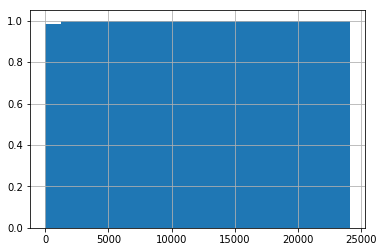

In [18]:
#Cumulative distribution function for all-time spend
num_obs = len(df[~df.All_Time_Spend.isnull()]) #Count the number of non null values
w = [1/num_obs for i in range(num_obs)] #Create an array of weights

df.All_Time_Spend.hist(cumulative=True, weights=w, bins=20);

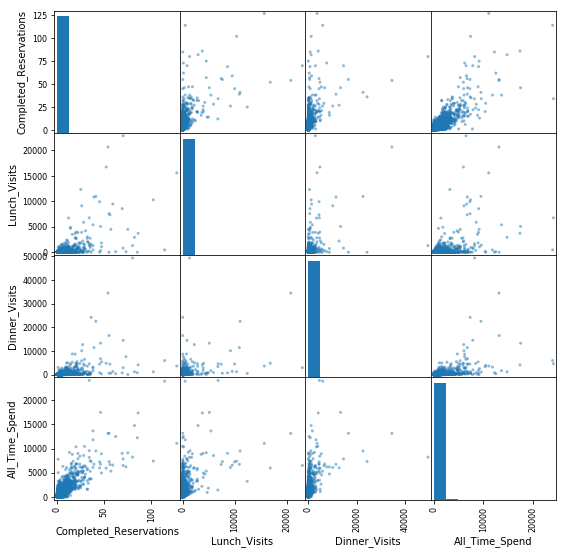

In [34]:
cols_to_scatter = ['Completed_Reservations','Lunch_Visits','Dinner_Visits','All_Time_Spend']
pd.plotting.scatter_matrix(df[cols_to_scatter], figsize=(9,9));

So no strong correlations there except people with more reservations spent more. Shocking.

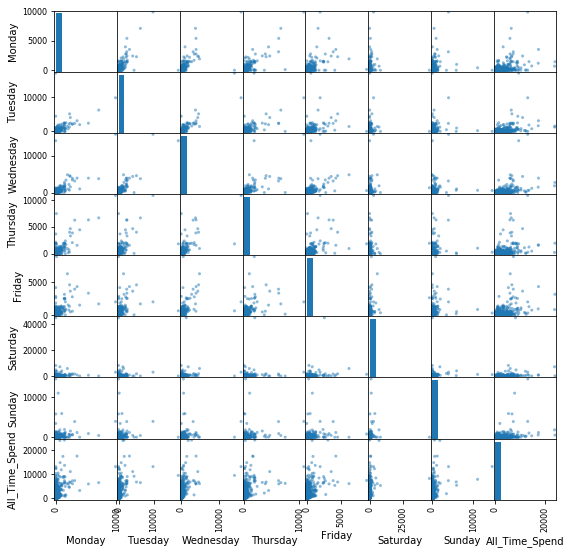

In [35]:
days_and_spend = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','All_Time_Spend']
pd.plotting.scatter_matrix(df[days_and_spend], figsize=(9,9));

So, Saturday visits are less strongly correlated with spend than other days. Probably because Saturday visitors are very occasional out-of-towners.

# Decision tree modeling for wine dinner marketing
Let's try to predict whether guests will make wine dinner reservations, so we can decide if we should market wine promotions to them.

**Normalize**

In [19]:
def normalize_func(value):
    output = (value - minimum) / range_
    return output

cols_to_norm = ['Completed_Reservations', 'Walk_in',
       'No_Show', 'Cancelled_Reservations', 'Brunch_Visits', 'Lunch_Visits',
       'Dinner_Visits', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Wine Dinner Resevations', 'Average_Party_Size',
       'Want wine dinner updates?', 'MEMBER_RATING',
       'Opted_in', 'bottle_price', 'Reg', 'Allergy', 'Industry', 'Soigne',
       'Wine_Lover']

for col in df[cols_to_norm]:
    try:
        minimum = df[col].min()
        maximum = df[col].max()
#         print('{}, Minimum: {}, Maximum{}'.format(col, minimum, maximum))
        range_ = maximum - minimum
        
        df[col] = df[col].map(normalize_func)
#         print('{}, Minimum: {}, Maximum{}'.format(col, df[col].min(), df[col].max()))
#         print('\n')
    except:
        print('Column {} is probably not numeric.'.format(col))

**Add a 'wine dinner reservations' dummy variable**

In [20]:
df['Wine Dinner Resevations'].value_counts()

0.0    74950
0.5      242
1.0        3
Name: Wine Dinner Resevations, dtype: int64

In [21]:
df['Attended_wine_dinner'] = df['Wine Dinner Resevations'].apply(lambda x: 1 if x>0 else 0)

**Make a decision tree!!**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [23]:
def make_dec_tree(feature_cols, m_depth=None):
    X = df[tree_feature_cols]
    y = df['Attended_wine_dinner']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # instantiate model
    dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=m_depth)

    # fit model
    dtree.fit(X_train, y_train)
    y_pred_class = dtree.predict(X_test)

    print("The model accuracy is {}.".format(metrics.accuracy_score(y_test, y_pred_class)))
    
    #return the model in case we want to make additional predictions with it
    return dtree
    
tree_feature_cols = ['Pre_Resy_Diner', 'Completed_Reservations', 'Brunch_Visits', 'Lunch_Visits',
       'Dinner_Visits', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday','All_Time_Spend', 'Want wine dinner updates?',
       'Opted_in', 'bottle_price', 'Reg', 'Industry', 
       'Wine_Lover', 'spend_per_visit']

dtree = make_dec_tree(tree_feature_cols)

The model accuracy is 0.9963295919995745.


Woah, not bad (or so it seems). 
Let's have a look at the tree.

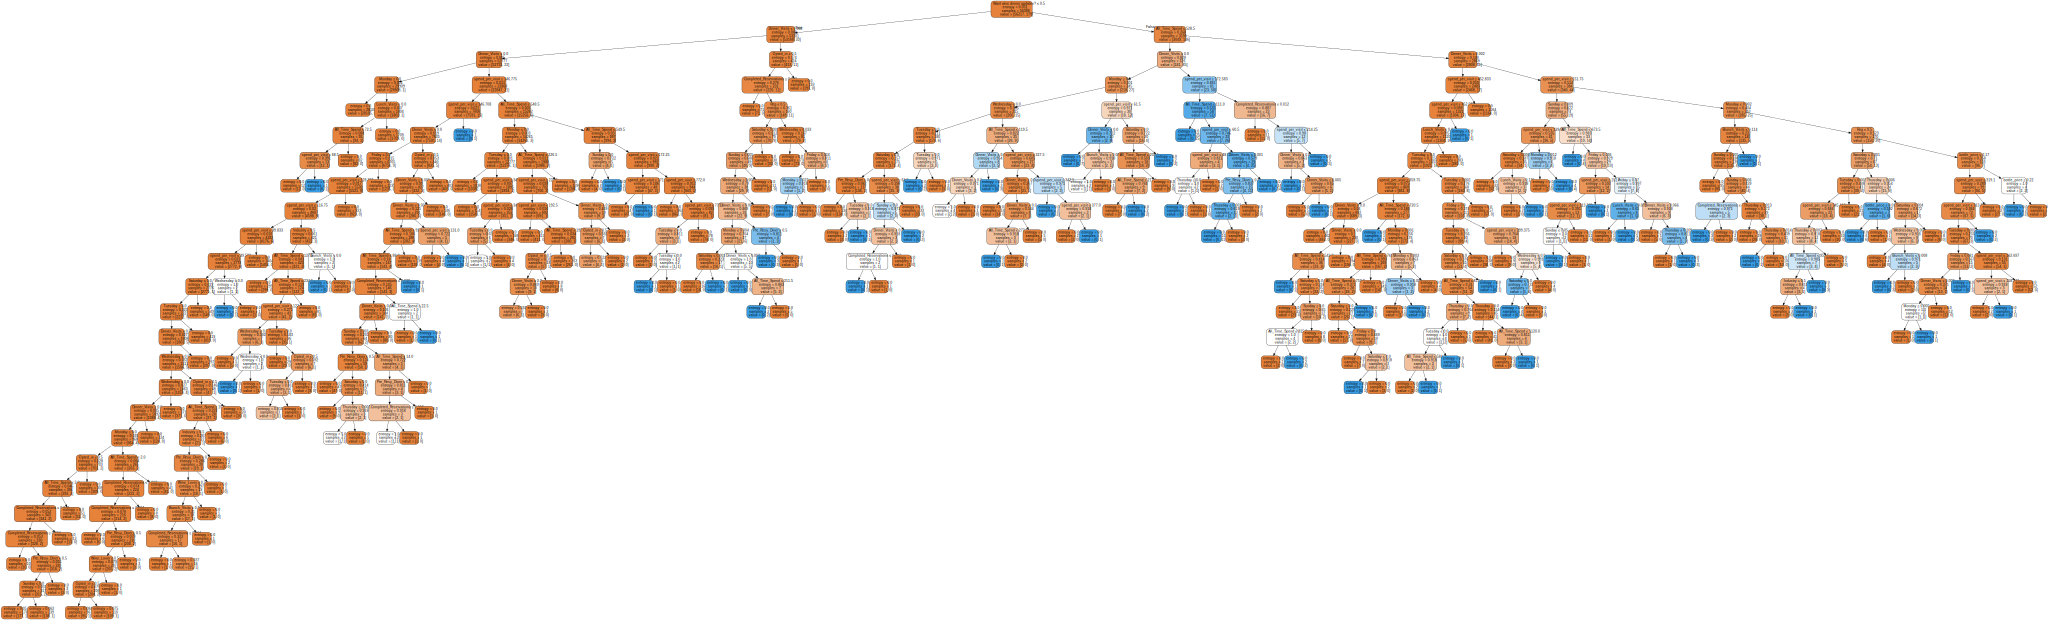

In [24]:
import graphviz 

dot_data = tree.export_graphviz(dtree, feature_names = tree_feature_cols, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

Okay, so the most important factor is if you signed up for email updates about future wine dinners.  
That's not really helpful for us for *predicting* if we should market to you.  
**What happens to model if we don't give it that feature?**

In [25]:
tree_feature_cols = ['Pre_Resy_Diner', 'Completed_Reservations', 'Brunch_Visits', 'Lunch_Visits',
       'Dinner_Visits', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday','All_Time_Spend', 'Opted_in', 'bottle_price', 'Reg', 'Industry', 
       'Wine_Lover', 'spend_per_visit']

dtree = make_dec_tree(tree_feature_cols);

The model accuracy is 0.9945209851587851.


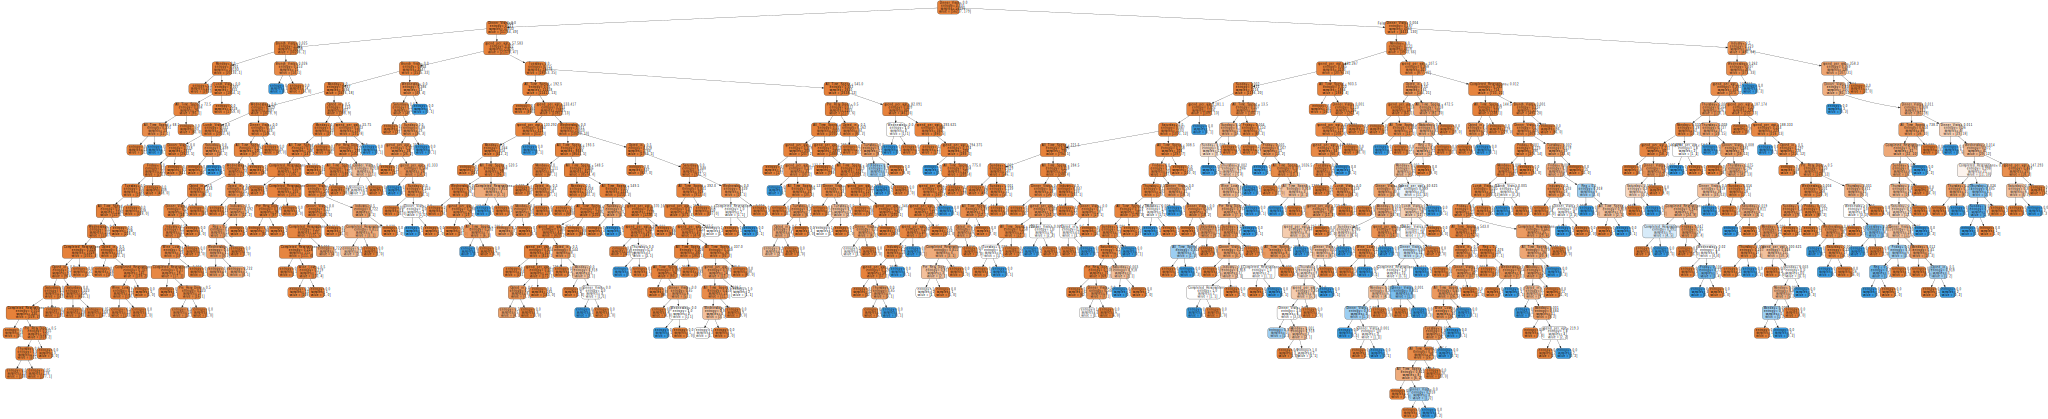

In [26]:
dot_data = tree.export_graphviz(dtree, feature_names = tree_feature_cols, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

This is really accurate, but the tree is huge and non-interpretable.

**How about we give it way fewer features?**  
Focus on features we can actually pull from Resy easily - and reduce max depth to 5.

In [31]:
tree_feature_cols = ['Pre_Resy_Diner', 'Completed_Reservations', 'All_Time_Spend', 'Wine_Lover']

dtree = make_dec_tree(tree_feature_cols, m_depth=5)

The model accuracy is 0.9964891749561147.


Accuracy is still super high, but accuracy would be really high if it just predicted "non-attendee" for everyone in the dataset, even though it would miss everyone who is an attendee (the class we actually care about). Because there are so few false negatives, it's scoring okay for accuracy.

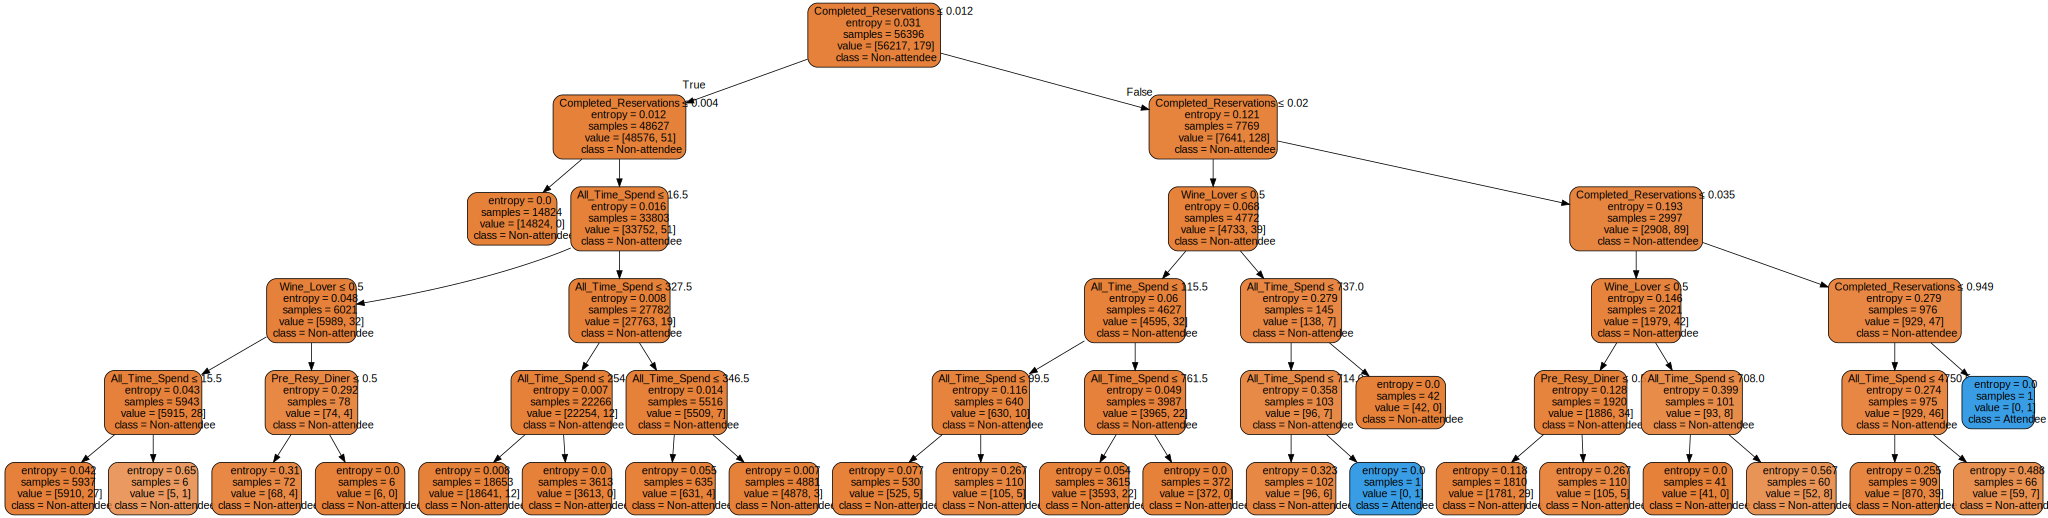

In [32]:
dot_data = tree.export_graphviz(dtree, feature_names = tree_feature_cols, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True, class_names = ['Non-attendee','Attendee']) 
graph = graphviz.Source(dot_data) 
graph

Looks cute, but it has two leaf nodes where it will predict a wine dinner attendee, confirming my suspicion.  
So... let's check out the rate of false negatives with the model.

In [33]:
def print_wine_confusion_score(model):
    X = df[tree_feature_cols]
    y = df['Attended_wine_dinner']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    y_pred_class = model.predict(X_test)
    conf = metrics.confusion_matrix(y_test, y_pred_class)
    # save confusion matrix and slice into four pieces
    print(conf)

    #[row, column]
    TP = conf[1, 1]
    TN = conf[0, 0]
    FP = conf[0, 1]
    FN = conf[1, 0]

    num_wine_attendees = sum(y_test)

    print("There were {} wine dinner attendees, and {} false negatives.".format(num_wine_attendees, FN))
    
    sensitivity = TP / float(FN + TP)
    print("The model sensitivity is {}.".format(sensitivity))
    return sensitivity

print_wine_confusion_score(dtree)

[[18733     0]
 [   66     0]]
There were 66 wine dinner attendees, and 66 false negatives.
The model sensitivity is 0.0.


0.0

Yeesh. That's **terrible**. Let's refine the model, trying to optimize for fewer false negatives.

# Improving the model
Ways to try improving the model:
1. Use random forest model
2. Output probability for 'wine attendee', not binary class membership, and choose all results above a certain threshold. Score based on false negatives - remember, there isn't a big penalty for false positives, since we're just sending emails!
3. Undersample the non-attendee class to even out proportions of class membership (attendee vs. non-attendee) - the current model is based on ~99% non-attendees, so it's probably over-weighting them.

**Random forest model**

Let's go back to the full-featured dataset to start, in case any of the features I eliminated are actually important.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
tree_feature_cols = ['Pre_Resy_Diner', 'Completed_Reservations', 'Brunch_Visits', 'Lunch_Visits',
       'Dinner_Visits', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday','All_Time_Spend', 'Want wine dinner updates?',
       'Opted_in', 'bottle_price', 'Reg', 'Industry', 
       'Wine_Lover', 'spend_per_visit']

X = df[tree_feature_cols]
y = df['Attended_wine_dinner']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
clf = RandomForestClassifier()

In [37]:
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

print("The model accuracy is {}.".format(metrics.accuracy_score(y_test, y_pred_class)))
print_wine_confusion_score(clf)

The model accuracy is 0.9970743124634289.
[[18730     3]
 [   52    14]]
There were 66 wine dinner attendees, and 52 false negatives.
The model sensitivity is 0.21212121212121213.


0.21212121212121213

An improvement, but still not great.  
**Let's try with more trees in the forest**, and chart the sensitivity as # of trees increase.

In [39]:
sensitivities = []
max_estimators = 50

for i in range(10,max_estimators):
    print("{} estimators in model".format(i))
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(X_train, y_train)
    y_pred_class = clf.predict(X_test)

    sens = print_wine_confusion_score(clf)
    sensitivities.append(sens)
    print("\n")

10 estimators in model
[[18730     3]
 [   50    16]]
There were 66 wine dinner attendees, and 50 false negatives.
The model sensitivity is 0.24242424242424243.


11 estimators in model
[[18730     3]
 [   52    14]]
There were 66 wine dinner attendees, and 52 false negatives.
The model sensitivity is 0.21212121212121213.


12 estimators in model
[[18729     4]
 [   47    19]]
There were 66 wine dinner attendees, and 47 false negatives.
The model sensitivity is 0.2878787878787879.


13 estimators in model
[[18730     3]
 [   49    17]]
There were 66 wine dinner attendees, and 49 false negatives.
The model sensitivity is 0.25757575757575757.


14 estimators in model
[[18731     2]
 [   53    13]]
There were 66 wine dinner attendees, and 53 false negatives.
The model sensitivity is 0.19696969696969696.


15 estimators in model
[[18729     4]
 [   50    16]]
There were 66 wine dinner attendees, and 50 false negatives.
The model sensitivity is 0.24242424242424243.


16 estimators in model


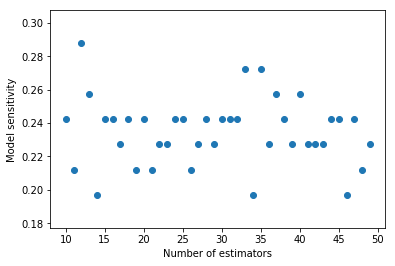

In [40]:
plt.scatter([i for i in range(10,max_estimators)], sensitivities)
plt.ylabel('Model sensitivity')
plt.xlabel('Number of estimators');

Increasing number of estimators doesn't help.  
**Try estimating probability, rather than binary class membership**

In [41]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
y_pred_prob = clf.predict_proba(X_test) #generate probability scores

y_pred_prob_list = [item[1] for item in y_pred_prob] #list of just the probability guesses for wine-attendee class

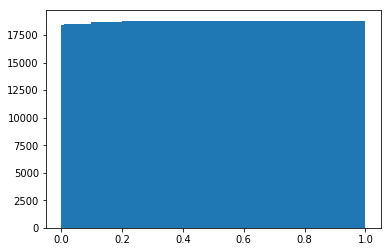

In [42]:
plt.hist(y_pred_prob_list, bins=100, cumulative=True);

Almost all of the probabilities are very low (although that's to be expected, since class membership is unbalanced).

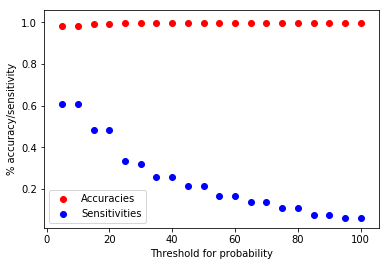

In [43]:
accuracies = []
sensitivities = []

threshold_step_size = -5

#set a threshold for the probability guess from the model above which we'll count the guess as a "wine attendee"
#generate a list of the class memberships based on this threshold
#then calculate the accuracy/sensitivity
for threshold in range(100, 0, threshold_step_size):
    threshold = threshold/100
    prob_class = [0 if x < threshold else 1 for x in y_pred_prob_list]
    conf = metrics.confusion_matrix(y_test, prob_class)
    
    TP = conf[1, 1]
    TN = conf[0, 0]
    FP = conf[0, 1]
    FN = conf[1, 0]
    
    accuracies.append(metrics.accuracy_score(y_test, prob_class))
    sensitivities.append(TP / float(FN + TP))

#chart the performance at different thresholds
plt.scatter([range(100, 0, threshold_step_size)], accuracies, color='Red', label="Accuracies")
plt.scatter([range(100, 0, threshold_step_size)], sensitivities, color='Blue', label="Sensitivities")
plt.xlabel('Threshold for probability')
plt.ylabel('% accuracy/sensitivity')
plt.legend();

Okay... some progress at last.  
So if we set the threshold <10% probability, the accuracy is high and the sensitivity is high too.
  
**Undersample the non-attendees**  
Let's see if sampling attendees/non-attendees at equal rates, combined with the threshold/probability approach, will give decent results.

In [44]:
#get indices of ppl who haven't attended a wine dinner
non_attendee_indices = df[df.Attended_wine_dinner == 0].index

#number of wine dinner attendees
sample_size = len(df[df.Attended_wine_dinner == 1])

#select random indices from the non-attendees
random_indices = np.random.choice(non_attendee_indices, sample_size, replace=False)

#return dataframe with the non_attendees
non_attendee_sample = df.loc[random_indices]

#concat the non-attendee-sample and the attendees
attendees = df[df.Attended_wine_dinner == 1]
undersampled_df = attendees.append(non_attendee_sample)

Now fit the model - first with raw voting (not using the probability threshold approach).

In [45]:
X = undersampled_df[tree_feature_cols]
y = undersampled_df['Attended_wine_dinner']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

print("The model accuracy is {}.".format(metrics.accuracy_score(y_test, y_pred_class)))
print_wine_confusion_score(clf)

The model accuracy is 0.9105691056910569.
[[17304  1429]
 [    2    64]]
There were 66 wine dinner attendees, and 2 false negatives.
The model sensitivity is 0.9696969696969697.


0.9696969696969697

Way better! That's awesome.  
Now give it a shot with the probability score method.

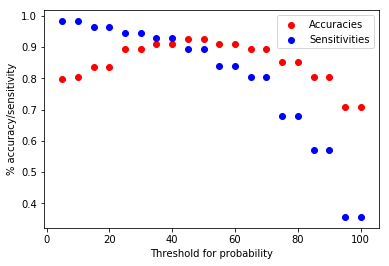

In [46]:
y_pred_prob = clf.predict_proba(X_test) #generate probability scores
y_pred_prob_list = [item[1] for item in y_pred_prob] #list of just the probability guesses for wine-attendee class

accuracies = []
sensitivities = []

threshold_step_size = -5

#set a threshold for the probability guess from the model above which we'll count the guess as a "wine attendee"
#generate a list of the class memberships based on this threshold
#then calculate the accuracy/sensitivity
for threshold in range(100, 0, threshold_step_size):
    threshold = threshold/100
    prob_class = [0 if x < threshold else 1 for x in y_pred_prob_list]
    conf = metrics.confusion_matrix(y_test, prob_class)
    
    TP = conf[1, 1]
    TN = conf[0, 0]
    FP = conf[0, 1]
    FN = conf[1, 0]
    
    accuracies.append(metrics.accuracy_score(y_test, prob_class))
    sensitivities.append(TP / float(FN + TP))

#chart the performance at different thresholds
plt.scatter([range(100, 0, threshold_step_size)], accuracies, color='Red', label='Accuracies')
plt.scatter([range(100, 0, threshold_step_size)], sensitivities, color='Blue', label='Sensitivities')
plt.xlabel('Threshold for probability')
plt.ylabel('% accuracy/sensitivity')
plt.legend();

Now this model does something! YAY.  

Sensitivity elbow around 50% threshold - let's set that as the cutoff.  
Let's check out the confusion matrix at 50%.

In [51]:
threshold = 0.4
prob_class = [0 if x < threshold else 1 for x in y_pred_prob_list]
conf = metrics.confusion_matrix(y_test, prob_class)
print(conf)

TP = conf[1, 1]
TN = conf[0, 0]
FP = conf[0, 1]
FN = conf[1, 0]

print("The model accuracy is {}.".format(metrics.accuracy_score(y_test, y_pred_class)))
print("\nAt {}% threshold:\n{} true positives,\n{} true negatives, \n{} false positives,\n{} false negatives."
      .format(threshold*100, TP, TN, FP, FN))

sensitivity = TP / float(FN + TP)
print("\nThe model sensitivity is {}.".format(sensitivity))

[[60  7]
 [ 4 52]]
The model accuracy is 0.9105691056910569.

At 40.0% threshold:
52 true positives,
60 true negatives, 
7 false positives,
4 false negatives.

The model sensitivity is 0.9285714285714286.


Interestingly the threshold method isn't performing better in this case, but it's still really good.  
We have a decent number of false positives - but in this case that's totally cool!

**One last thing: can we get comparable performance with easily-pulled features?**

In [52]:
tree_feature_cols = ['Pre_Resy_Diner', 'Completed_Reservations', 'Brunch_Visits', 'Lunch_Visits',
       'Dinner_Visits', 'All_Time_Spend', 'Opted_in', 'Reg', 'Industry', 'Wine_Lover']

X = undersampled_df[tree_feature_cols]
y = undersampled_df['Attended_wine_dinner']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

print("The model accuracy is {}.".format(metrics.accuracy_score(y_test, y_pred_class)))

conf = metrics.confusion_matrix(y_test, y_pred_class)
print(conf)

#[row, column]
TP = conf[1, 1]
TN = conf[0, 0]
FP = conf[0, 1]
FN = conf[1, 0]

num_wine_attendees = sum(y_test)

print("There were {} wine dinner attendees, and {} false negatives.".format(num_wine_attendees, FN))

sensitivity = TP / float(FN + TP)
print("The model sensitivity is {}.".format(sensitivity))

The model accuracy is 0.8861788617886179.
[[61  6]
 [ 8 48]]
There were 56 wine dinner attendees, and 8 false negatives.
The model sensitivity is 0.8571428571428571.


This model performs really well with these limited columns, and doesn't require the threshold approach.  
So: feel confident using this model in production!

# Conclusion
The initial decision tree model performed pretty badly, but the following adjustments got it to perform quite well:
1. Random forest model
2. Undersampling from the non-attendee set
3. Setting a probability threshold for determining class membership
  
The model also performs adequately with a more limited set of features, so we can implement it for actual marketing campaigns.